# simple linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#making own data
n=100
x=np.random.rand(n)*100
noise=np.random.rand(n)*100

y=2*x+3+noise

df=pd.DataFrame({"feature":x, "target":y})
df.head()

,feature,target
0,92.865625,217.134731
1,70.936281,231.267380
2,86.843247,207.282975
3,27.195228,127.271613
4,97.033462,217.534393


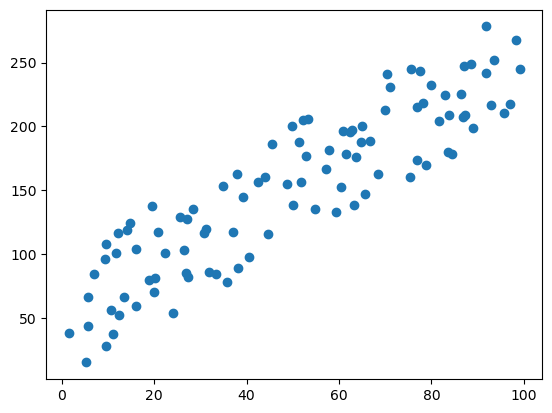

In [3]:
plt.scatter(df["feature"], df["target"])
plt.show()

In [4]:
X=df["feature"].values.reshape(-1,1)
y=df["target"].values.reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr=LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred=lr.predict(X_test)

In [11]:
lr.coef_

array([[2.01896223]])

In [12]:
lr.intercept_

array([53.48722274])

In [13]:
#y=mx+b
y_pred[0], X_test[0]

(array([93.03935451]), array([19.59032776]))

In [14]:
lr.coef_*X_test[0]+lr.intercept_

array([[93.03935451]])

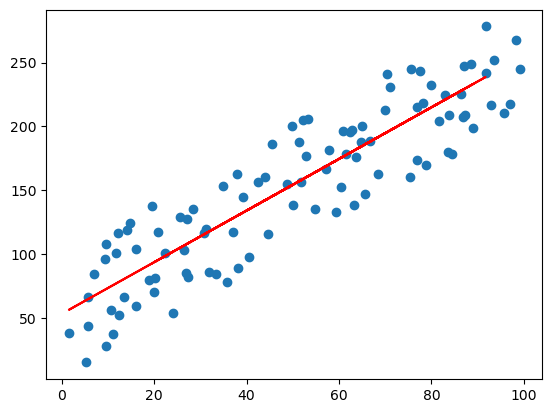

In [15]:
plt.scatter(df["feature"], df["target"])
plt.plot(X_test, lr.predict(X_test), color="red")
plt.show()

# simple linear regression code from scratch

In [16]:
class MeraLR:
    
    def __init__(self):
        
        self.m=None
        self.b=None
        
    def fit(self, X_train, y_train):
        
        num=0
        den=0
        
        for i in range(X_train.shape[0]):
            num=num + ((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den=den + ((X_train[i]-X_train.mean())**2)
            
        self.m=(num/den)
        self.b=(y_train.mean()-self.m*X_train.mean())
        
        print(self.m)
        print(self.b)
        
    def predict(self, X_test):
        
        return (self.m*X_test+self.b)

In [17]:
lr=MeraLR()

In [18]:
X=df["feature"].values
y=df["target"].values

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
mlr=MeraLR()

In [21]:
mlr.fit(X_train, y_train)

2.018962226884343
53.48722274164504


In [30]:
y_pred=mlr.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
mean_absolute_error(y_test, y_pred)

24.127914394343932

In [32]:
mean_squared_error(y_test, y_pred)

817.6378860212774

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

28.594368082216423

In [44]:
r2_score(y_test, y_pred)

0.7381495323890628

In [39]:
X_test.shape[0]

20

In [48]:
adjusted_r2=1-((1-r2)*(20-1)/(20-1-1))

In [49]:
adjusted_r2

0.7236022841884552

In [67]:
new_df=df.copy()

new_df["feature_2"]=new_df["target"] + np.random.randint(-12,12,100)*5

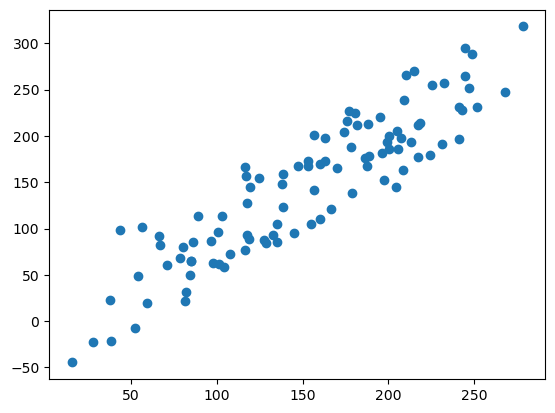

In [81]:
plt.scatter(new_df["target"], new_df["feature_2"])
plt.show()

In [91]:
X=new_df[["feature", "feature_2"]]
y=new_df["target"]

In [92]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [93]:
lr=LinearRegression()

In [94]:
lr.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred=lr.predict(X_test)

In [98]:
r2=r2_score(y_pred, y_test)

In [101]:
adjusted_r2=1-((1-r2)*(20-1)/(20-1-2))

In [102]:
adjusted_r2

0.8685600251036933

In [104]:
r2

0.8823958119348835

# multiple linear regression

In [17]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
X, y = make_regression(n_samples=100, n_features=2, n_targets=1, n_informative=2, noise=50)

In [16]:
df=pd.DataFrame({"feature1":X[:, 0], "feature2":X[:, 1], "target":y})
df

,feature1,feature2,target
0,0.468920,0.265843,62.695522
1,0.193171,0.241387,70.087539
2,0.242114,-0.431447,-12.501437
3,0.130603,-0.265345,5.249553
4,0.772498,0.248926,55.842754
...,...,...,...
95,0.514228,-2.771146,-98.293973
96,-0.210039,1.362014,27.487261
97,-2.576031,-0.264799,-191.136171
98,-2.682959,0.362206,-157.050699


In [24]:
fig=px.scatter_3d(df, x="feature1", y="feature2", z="target")
fig.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred=lr.predict(X_test)

In [34]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

46.3888874372268
3335.0527290786004
0.4701970096452859


In [58]:
x=np.linspace(-5, 5, 10)
y=np.linspace(-5, 5, 10)

xgrid, ygrid=np.meshgrid(y, x)

final=np.vstack((xgrid.ravel().reshape(1,100), ygrid.ravel().reshape(1,100))).T

z_final=lr.predict(final).reshape(10,10)

z=z_final

In [59]:
fig=px.scatter_3d(df, x="feature1", y="feature2", z="target")

fig.add_trace(go.Surface(x=x, y=y, z=z))

fig.show()

In [102]:
from sklearn.datasets import load_diabetes

In [103]:
X, y=load_diabetes(return_X_y=True)

In [104]:
X.shape, y.shape

((442, 10), (442,))

In [105]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [106]:
lr=LinearRegression()

In [107]:
lr.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred=lr.predict(X_test)

In [109]:
r2_score(y_test,y_pred)

0.4384316213369279

In [110]:
lr.coef_

array([ -30.62219046, -272.2506057 ,  528.85252681,  327.69716891,
       -581.01973841,  332.97061365,  -27.97314298,  139.28036115,
        665.07667773,   61.90517166])

In [111]:
lr.intercept_

151.4300932966009

In [120]:
class MeraMLR:
    
    def __init__(self):
        
        self.coef_=None
        self.intercept_=None
        
    def fit(self, X_train, y_train):
        
        X_train=np.insert(X_train, 0, 1, axis=1)
        
        betas=np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        
        self.intercept_=betas[0]
        self.coef_=betas[1:]
            
    def predict(self, X_test):
        
        y_pred=self.intercept_+np.dot(X_test, self.coef_)
        return y_pred

In [121]:
mmlr=MeraMLR()

In [122]:
mmlr.fit(X_train, y_train)

In [124]:
y_pred=mmlr.predict(X_test)

In [126]:
r2_score(y_test, y_pred)

0.43843162133692815